In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns

In [2]:
df_cifar_all = pd.read_csv("../../REALRESULTS/060221-234441_CIFAR10_metrics.csv")
df_stl_all = pd.read_csv("../../REALRESULTS/060221-235053_STL10_metrics.csv")
df_svhn_all = pd.read_csv("../../REALRESULTS/060321-001129_SVHN_metrics.csv")
df_cifar_limited = pd.read_csv("../../REALRESULTS/FEW Shot/060321-015613_CIFAR10_metrics.csv")
df_stl_limited = pd.read_csv("../../REALRESULTS/FEW Shot/060321-020115_STL10_metrics.csv")
df_svhn_limited = pd.read_csv("../../REALRESULTS/FEW Shot/060321-020423_SVHN_metrics.csv")

In [3]:
sample_types = np.array(['rand', 'kmeans', 'loss_based_mean', 'loss_based_std',
       'grad_based_mean', 'grad_based_std'])

percentages = 100 * np.array([0.0025, 0.005, 0.0075, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5, 0.75, 1])
num_examples = np.arange(5, 99)

In [4]:
sample_dict = {'rand':'Random', 
                'kmeans':'KMeans', 
                'loss_based_mean':'LossMean', 
                'loss_based_std':'LossVar',
                'grad_based_mean':'GradMean', 
                'grad_based_std':'GradVar',
               }

In [5]:
def select_examples(df1, df2, num_examples_1, num_examples_2):
    df1_masked = df1[df1["num_examples"].isin(num_examples_1)]
    df2_masked = df2[df2["num_examples"].isin(num_examples_2)]
    df_final = pd.concat([df1_masked,df2_masked])
    return df_final

In [8]:
df_cifar = select_examples(df_cifar_limited, df_cifar_all, np.arange(5, 92, 3), np.array([137, 275, 412, 550, 687, 1375]))
df_stl = select_examples(df_stl_limited, df_stl_all, np.arange(5, 92, 3), np.array([250, 500, 750, 1000, 1250, 2500, 3750]))
df_svhn = select_examples(df_svhn_limited, df_svhn_all, np.arange(5, 92, 3), np.array([500,1000, 1500, 2000, 2500, 5000, 7500]))

In [9]:
# Mask 1 is which sample_types you want from df 1
def merge_dfs(df1, df2, mask_1):
    mask = np.array(mask_1)
    df1_masked = df1[df1["sampler_type"].isin(mask)]
    df2_masked = df2[~df2["sampler_type"].isin(mask)]
    df_final = pd.concat([df1_masked,df2_masked])
    return df_final
    

In [10]:
def get_rankings(scores, num, num_examples): # first num percentages to rank
    total_rankings = defaultdict(int)
    for index, percentage in enumerate(num_examples[:num]):
        names = sorted(scores.items(), key=lambda item: item[1][index], reverse=True)
        ranking = [names[0][0], names[1][0], names[2][0], names[3][0], names[4][0], names[5][0]]
        for rank, name in enumerate(ranking):
            total_rankings[name] = total_rankings[name] + (rank + 1)
#         import pdb; pdb.set_trace()
    
    sum_cur = 0
    for key, value in total_rankings.items():
        sum_cur += (value / num)
        print(key, value / num) # divide by total
    print(sum_cur)


def plot_metrics(df_full, ds, num_to_rank=30):
    df = df_full.groupby(["ds_type", "sampler_type", "num_examples"]).mean().reset_index()
    plt.figure(figsize=(8,5))
    scores = {}
    for sample_type in df["sampler_type"].unique():
        num_examples = df[df.sampler_type == sample_type]["num_examples"].tolist()
        lr_acc = df[df.sampler_type == sample_type]["lr_byol_acc"].tolist()
        scores[sample_type] = lr_acc
        sns.scatterplot(num_examples, lr_acc, label=sample_dict[sample_type])

    get_rankings(scores, num_to_rank, num_examples)
        
    plt.legend()
#     plt.xticks(np.arange(len(percentages)), percentages)
    plt.xscale("log")
    plt.xlabel("Number of Labels Used")
    plt.ylabel("Accuracy")
    plt.title("Top-1 Accuracy: {}".format(ds), fontsize=14)
    plt.show()
    
    scores = {}
    plt.figure()
    for sample_type in df["sampler_type"].unique():
        num_examples = df[df.sampler_type == sample_type]["num_examples"].tolist()
        lr_acc = df[df.sampler_type == sample_type]["lr_byol_top3_acc"].tolist()
        scores[sample_type] = lr_acc
        plt.scatter(num_examples, lr_acc, label=sample_type)

    get_rankings(scores, num_to_rank, num_examples)
    
    plt.legend()
    plt.xscale("log")
#     plt.xticks(np.arange(len(percentages)), percentages)
    plt.title("Top-3 Acc {}".format(ds))
    plt.show()

grad_based_mean 3.8666666666666667
grad_based_std 3.533333333333333
loss_based_mean 5.9
loss_based_std 2.066666666666667
kmeans 3.2666666666666666
rand 2.3666666666666667
21.0


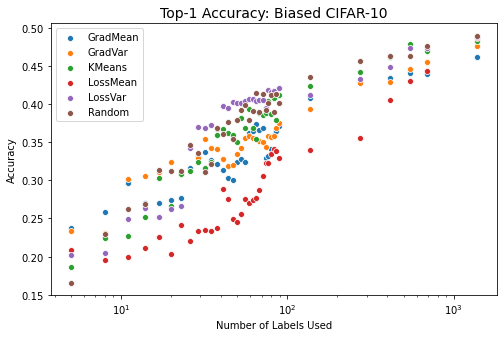

grad_based_mean 4.033333333333333
grad_based_std 3.533333333333333
loss_based_mean 5.766666666666667
kmeans 2.8666666666666667
loss_based_std 2.7333333333333334
rand 2.066666666666667
21.0


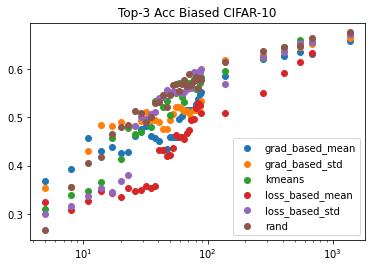

In [11]:
plot_metrics(df_cifar, "Biased CIFAR-10")

grad_based_mean 4.2
loss_based_std 2.2
rand 2.2
loss_based_mean 5.1
kmeans 2.4
grad_based_std 4.9
21.0


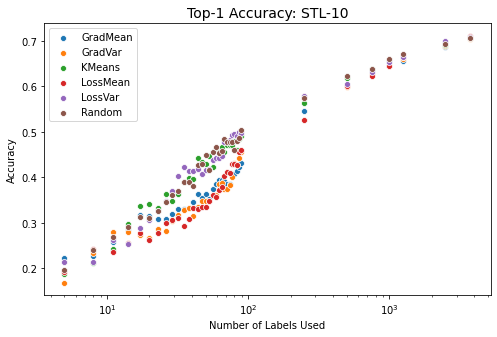

grad_based_mean 5.1
kmeans 2.1333333333333333
rand 1.7
loss_based_std 3.1333333333333333
grad_based_std 3.966666666666667
loss_based_mean 4.966666666666667
21.0


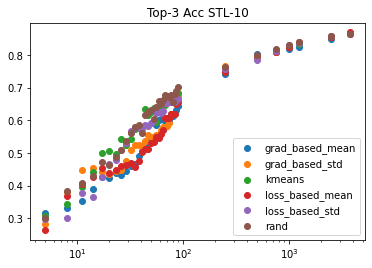

In [12]:
plot_metrics(df_stl, "STL-10")

loss_based_std 2.3333333333333335
grad_based_mean 2.033333333333333
kmeans 3.8
rand 3.4
loss_based_mean 4.033333333333333
grad_based_std 5.4
21.0


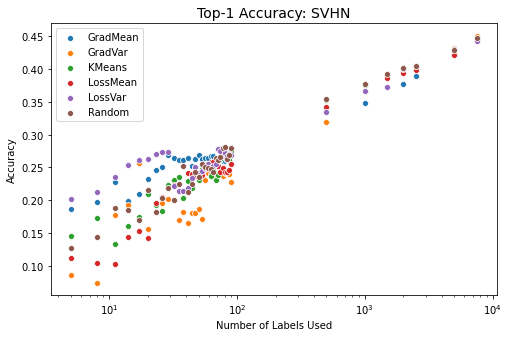

grad_based_mean 2.9
loss_based_std 2.433333333333333
kmeans 3.2
rand 2.7333333333333334
grad_based_std 5.3
loss_based_mean 4.433333333333334
21.0


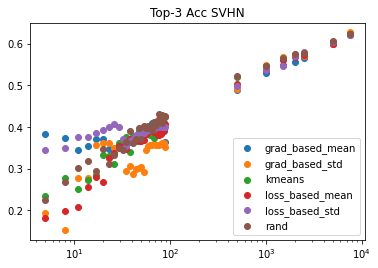

In [13]:
plot_metrics(df_svhn, "SVHN")